In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import os
import cv2 as cv

In [3]:
from tensorflow import keras

In [4]:
from keras import layers, Sequential ,Model

In [5]:
from keras.layers import Flatten,Dropout,Dense,Input,Lambda,MaxPooling3D,Conv2D

In [6]:
path=r"C:\Users\HP\Downloads\banana\BananaLSD\OriginalSet"

In [7]:
dis=os.listdir(path)

In [8]:
dis

['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']

In [9]:
Data=[]

In [10]:
for i in dis:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(130,130))
        T=dis.index(i)
        Data.append([C,T])

In [11]:
import random
random.shuffle(Data)

In [12]:
T=dis.index('cordana')
print(T)

0


In [13]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)

In [14]:
F=np.array(F)

In [15]:
T=np.array(T)

In [16]:
F=F/25

In [17]:
T=pd.get_dummies(T,dtype="int")

VGG16

In [18]:
from keras.applications.vgg16 import VGG16

In [19]:
from keras.applications.vgg16 import preprocess_input

In [20]:
vgg=VGG16(input_shape=(130,130,3),weights='imagenet',include_top=False)

In [21]:
for i in vgg.layers:
    i.trainabler=False

In [22]:
X=Flatten()(vgg.output)

In [23]:
y=Dense(20,activation='relu')(X)

In [24]:
z=Dense(4,activation='softmax')(y)

In [25]:
model=Model(vgg.input,z)

In [26]:
from keras.losses import CategoricalCrossentropy

In [27]:
model.compile(optimizer="adam",
             loss="CategoricalCrossentropy",
             metrics=["accuracy"])

In [28]:
model.fit(F,T,epochs=20,validation_split=0.15)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4005 - loss: 2.2554 - val_accuracy: 0.5319 - val_loss: 1.2082
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4982 - loss: 1.1819 - val_accuracy: 0.5390 - val_loss: 0.9672
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5334 - loss: 0.9057 - val_accuracy: 0.5532 - val_loss: 0.8324
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5847 - loss: 0.8526 - val_accuracy: 0.4397 - val_loss: 1.2445
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5846 - loss: 1.0099 - val_accuracy: 0.6738 - val_loss: 0.8477
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6699 - loss: 0.7863 - val_accuracy: 0.7021 - val_loss: 0.7412
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7216 - loss: 0.7038 - val_accuracy: 0.6879 - val_loss: 0.7326
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7003 - loss: 0.7131 - val_accuracy: 0.7305 - val_loss:

In [90]:
img=r"C:\Users\HP\Downloads\banana\BananaLSD\OriginalSet\sigatoka\5.jpeg"

In [91]:
img1=cv.imread(img)

In [92]:
img2=cv.resize(img1,(130,130))

In [93]:
img31=img2.reshape(1,130,130,3)

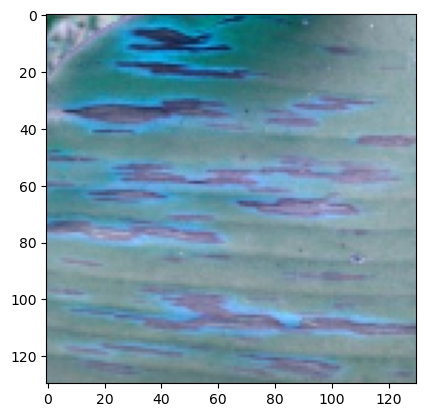

In [94]:
plt.imshow(img2)

In [95]:
pred1=model.predict(img31)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [96]:
np.argmax(pred1)

3

VGG19

In [36]:
from keras.applications.vgg19 import VGG19

In [37]:
from keras.applications.vgg19 import preprocess_input

In [38]:
vgg=VGG19(input_shape=(130,130,3),weights='imagenet',include_top=False)

In [39]:
for i in vgg.layers:
    i.trainabler=False

In [40]:
X=Flatten()(vgg.output)

In [41]:
y=Dense(20,activation='relu')(X)

In [42]:
z=Dense(4,activation='softmax')(y)

In [43]:
model=Model(vgg.input,z)

In [44]:
from keras.losses import CategoricalCrossentropy

In [45]:
model.compile(optimizer="adam",
             loss="CategoricalCrossentropy",
             metrics=["accuracy"])

In [46]:
model.fit(F,T,epochs=20,validation_split=0.15)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.3825 - loss: 5.1380 - val_accuracy: 0.5532 - val_loss: 0.9374
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.5313 - loss: 0.9899 - val_accuracy: 0.5674 - val_loss: 0.8830
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5550 - loss: 0.9217 - val_accuracy: 0.5887 - val_loss: 0.8596
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.6041 - loss: 0.9165 - val_accuracy: 0.5461 - val_loss: 0.8855
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5819 - loss: 0.9033 - val_accuracy: 0.6312 - val_loss: 0.8009
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.6159 - loss: 0.9088 - val_accuracy: 0.6170 - val_loss: 0.7900
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.6276 - loss: 0.8117 - val_accuracy: 0.7234 - val_loss: 0.7246
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.6178 - loss: 0.8143 - val_accuracy: 0.5957 - val_loss:

In [97]:
img=r"C:\Users\HP\Downloads\banana\BananaLSD\OriginalSet\pestalotiopsis\84.jpeg"

In [98]:
img1=cv.imread(img)

In [99]:
img2=cv.resize(img1,(130,130))

In [100]:
img3=img2.reshape(1,130,130,3)

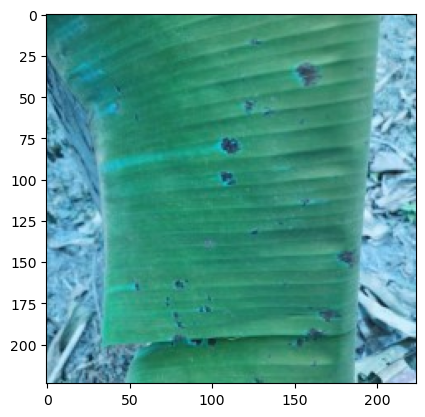

In [101]:
plt.imshow(img1)

In [102]:
pred2=model.predict(img3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [53]:
np.argmax(pred2)

2

Resnet

In [54]:
from keras.applications.resnet import ResNet50

In [55]:
from keras.applications.resnet import preprocess_input

In [56]:
resnet=ResNet50(input_shape=(130,130,3),weights='imagenet',include_top=False)

In [57]:
for i in resnet.layers:
    i.trainabler=False

In [58]:
X=Flatten()(resnet.output)

In [59]:
y=Dense(20,activation='relu')(X)

In [60]:
z=Dense(4,activation='softmax')(y)

In [61]:
model=Model(resnet.input,z)

In [62]:
from keras.losses import CategoricalCrossentropy

In [63]:
model.compile(optimizer="adam",
             loss="CategoricalCrossentropy",
             metrics=["accuracy"])

In [64]:
model.fit(F,T,epochs=20,validation_split=0.15)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5902 - loss: 2.6507 - val_accuracy: 0.5319 - val_loss: 3690005.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7678 - loss: 0.6864 - val_accuracy: 0.5319 - val_loss: 6139782.5000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2631s 110s/step - accuracy: 0.8477 - loss: 0.5850 - val_accuracy: 0.4397 - val_loss: 7428.7617
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9180 - loss: 0.2681 - val_accuracy: 0.1773 - val_loss: 1.4149
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9460 - loss: 0.1602 - val_accuracy: 0.1348 - val_loss: 2.8440
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9716 - loss: 0.0972 - val_accuracy: 0.1348 - val_loss: 4.9927
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9862 - loss: 0.0400 - val_accuracy: 0.1348 - val_loss: 7.1636
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9698 - loss: 0.1068 - val_accuracy:

In [137]:
img=r"C:\Users\HP\Downloads\banana\BananaLSD\OriginalSet\sigatoka\51.jpeg"

In [138]:
img1=cv.imread(img)

In [139]:
img2=cv.resize(img1,(130,130))

In [140]:
img3=img2.reshape(1,130,130,3)

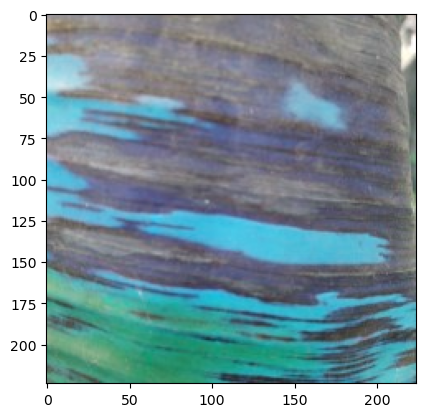

In [141]:
plt.imshow(img1)

In [142]:
pred3=model.predict(img3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [143]:
np.argmax(pred3)

3

InceptionV3

In [72]:
from keras.applications import InceptionV3
model = InceptionV3(weights='imagenet')


In [73]:
from keras.applications.inception_v3 import preprocess_input

In [74]:
inception_v3=InceptionV3(input_shape=(130,130,3),weights='imagenet',include_top=False)

In [75]:
for i in inception_v3.layers:
    i.trainabler=False

In [76]:
X=Flatten()(inception_v3.output)

In [77]:
y=Dense(20,activation='relu')(X)

In [78]:
z=Dense(4,activation='softmax')(y)

In [79]:
model=Model(inception_v3.input,z)

In [80]:
model.compile(optimizer="adam",
             loss="CategoricalCrossentropy",
             metrics=["accuracy"])

In [81]:
model.fit(F,T,epochs=20,validation_split=0.15)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 833ms/step - accuracy: 0.5034 - loss: 1.3270 - val_accuracy: 0.3546 - val_loss: 1.2859
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 747ms/step - accuracy: 0.8105 - loss: 0.5382 - val_accuracy: 0.1560 - val_loss: 1.3928
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 740ms/step - accuracy: 0.9198 - loss: 0.2880 - val_accuracy: 0.1844 - val_loss: 498.3741
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 739ms/step - accuracy: 0.8603 - loss: 0.3318 - val_accuracy: 0.3546 - val_loss: 1.3311
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 742ms/step - accuracy: 0.8600 - loss: 0.3101 - val_accuracy: 0.4539 - val_loss: 2.6314
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 749ms/step - accuracy: 0.9147 - loss: 0.2146 - val_accuracy: 0.4894 - val_loss: 6.1162
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 779ms/step - accuracy: 0.9025 - loss: 0.2625 - val_accuracy: 0.2695 - val_loss: 2.4585
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 800ms/step - accuracy: 0.8657 - loss: 0.4041 - val_ac

In [144]:
img=r"C:\Users\HP\Downloads\banana\BananaLSD\OriginalSet\sigatoka\51.jpeg"

In [145]:
img1=cv.imread(img)

In [146]:
img2=cv.resize(img1,(130,130))

In [147]:
img3=img2.reshape(1,130,130,3)

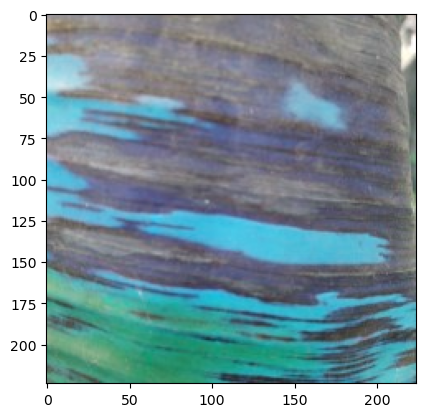

In [148]:
plt.imshow(img1)

In [149]:
pred4=model.predict(img3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [150]:
np.argmax(pred4)

3